In [1]:
import tensorflow as tf
print(tf.__version__)

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)


train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder

sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))


embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()





2.4.1


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXDBCTE/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXDBCTE/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXDBCTE/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.
Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
___________________________________

In [2]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 15s 34ms/step - loss: 0.6874 - accuracy: 0.5605 - val_loss: 0.6324 - val_accuracy: 0.7571
Epoch 2/10
391/391 [==============================] - 14s 33ms/step - loss: 0.5811 - accuracy: 0.7698 - val_loss: 0.4734 - val_accuracy: 0.8211
Epoch 3/10
391/391 [==============================] - 13s 33ms/step - loss: 0.4176 - accuracy: 0.8558 - val_loss: 0.3774 - val_accuracy: 0.8548
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 0.3249 - accuracy: 0.8849 - val_loss: 0.3356 - val_accuracy: 0.8730
Epoch 5/10
391/391 [==============================] - 14s 33ms/step - loss: 0.2797 - accuracy: 0.9008 - val_loss: 0.3243 - val_accuracy: 0.8720
Epoch 6/10
391/391 [==============================] - 14s 33ms/step - loss: 0.2429 - accuracy: 0.9138 - val_loss: 0.3086 - val_accuracy: 0.8802
Epoch 7/10
391/391 [==============================] - 14s 34ms/step - loss: 0.2272 - accuracy: 0.9196 - val_loss: 0.3064 - val_accuracy:

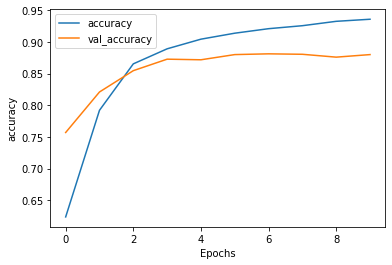

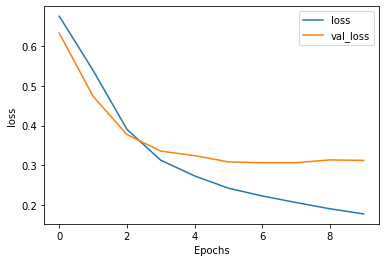

In [3]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")